<a href="https://colab.research.google.com/github/razevedocosta/data_analysis/blob/master/Day_Trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

Este notebook apresenta as seguintes informações:
1.   Resumo das operações realizadas no mês
2.   Operações agrupadas por dia
3.   Gráfico de pizza - taxa de acerto
4.   Gráfico de barra - resultado por dia
5.   Histograma do resultado líquido

# Importação de Dados

In [0]:
import pandas as pd

dados = pd.read_csv('trade_maio.csv', sep=";")
#dados.loc[dados['Data'] == '25/05/2020']

# Tratamento dos dados

In [0]:
# excluindo colunas desnecessárias
dados.drop(['Qtd', 'Saldo', 'Custos', 'Result Aber', 'Result Fech', 'TET', 'MEP', 'MEN'], inplace = True, axis=1)
#dados.head()

In [0]:
# replace para valores monetários
dados['Res. Tot. Líq.'] = [x.replace(".", "") for x in dados['Res. Tot. Líq.']]
dados['Res. Tot. Líq.'] = [x.replace(",", ".") for x in dados['Res. Tot. Líq.']]

dados['Res. Tot. Líq.'] = dados['Res. Tot. Líq.'].astype(float)

#dados['Res. Tot. Líq.']

In [0]:
# atribuindo gain ou loss para uma nova coluna resultado
dados['resultado'] = dados['Res. Tot. Líq.'].apply(lambda x: 'gain' if x > 0 else 'loss')
#dados.tail()
#dados.head()

# Resumo do Mês

In [0]:
#dados['resultado'].unique()
#dados['resultado'].value_counts()

In [0]:
# total de operações em gain
gain = dados.loc[dados['resultado'] == 'gain']
gain = gain['resultado'].count()

# total de operações em loss
loss = dados.loc[dados['resultado'] == 'loss']
loss = loss['resultado'].count()

In [8]:
# criar dataframe para resumo das informações do mês
total = dados['Papel'].count()
maximo = dados['Res. Tot. Líq.'].max()
minimo = dados['Res. Tot. Líq.'].min()
total_bruto = dados['Res. Tot. Líq.'].sum()
dias_operados = dados['Data'].unique().size

descricao = {'item': ['total_ordens','gain','loss','maximo','minimo','total_bruto','dias_operados'],
             'valor': [total, gain, loss, maximo, minimo, total_bruto, dias_operados]
            }

df = pd.DataFrame(descricao, columns = ['item', 'valor'])

print("RESUMO DAS OPERAÇÕES DO MÊS")
df

RESUMO DAS OPERAÇÕES DO MÊS


,item,valor
0,total_ordens,111.0
1,gain,56.0
2,loss,55.0
3,maximo,823.0
4,minimo,-1050.0
5,total_bruto,-1026.0
6,dias_operados,16.0


# Análises

Visualização de alguns resultados quantitativos, tais como: 
**quadro geral de operações, distribuição dos resultados por dia, taxa de acerto (gain e loss)**

## Quadro geral

In [0]:
# total de operações realizadas por dia
operacoes = dados.groupby(['Data'], as_index=False)['Res. Tot. Líq.'].count()
nova_coluna = operacoes['Res. Tot. Líq.']

# agrupar por data e somar o resultado líquido
resumo = dados.groupby(['Data'], as_index=False)['Res. Tot. Líq.'].sum()

# renomear o nome das colunas
resumo.rename(columns={'Data':'data', 'Res. Tot. Líq.':'resultado'}, inplace=True)

# inserir a coluna qtde_operacoes no dataFrame
resumo.insert(loc=2, column='qtde_operacoes', value=nova_coluna)

In [0]:
#grupo_data = dados.groupby('Data')
#for data, dados in grupo_data: 
#print(data)
#for data, dados in grupo_data: 
#    print('{} -> {}'.format(data, dados['Res. Tot. Líq.'].count()))

In [0]:
dados[['Data', 'Res. Tot. Líq.']]

# total de operações com gain
dfGain = dados.loc[dados['resultado'] == 'gain']
gain = dfGain.groupby(['Data'], as_index=False)['resultado'].count()

In [0]:
# total de operações com loss
dfLoss = dados.loc[dados['resultado'] == 'loss']
loss = dfLoss.groupby(['Data'], as_index=False)['resultado'].count()

In [0]:
# inserir as colunas gain e loss no dataFrame
resumo.insert(loc=3, column='gain', value=gain['resultado'])
resumo.insert(loc=4, column='loss', value=loss['resultado'])

In [0]:
resumo.set_index('data', inplace=True)
resumo['gain'] = gain.set_index('Data')['resultado']
resumo['loss'] = loss.set_index('Data')['resultado']

In [15]:
print("QUADRO GERAL DE OPERAÇÕES")
resumo

QUADRO GERAL DE OPERAÇÕES


,resultado,qtde_operacoes,gain,loss
data,,,,
05/05/2020,-796.0,42,17.0,25.0
06/05/2020,-620.0,5,2.0,3.0
07/05/2020,-148.0,12,4.0,8.0
08/05/2020,24.0,4,2.0,2.0
11/05/2020,142.0,4,3.0,1.0
13/05/2020,-71.0,7,4.0,3.0
14/05/2020,-96.0,11,5.0,6.0
15/05/2020,-82.0,1,NaN,1.0
19/05/2020,24.0,4,2.0,2.0


*OBS: Apresentando erro na contagem dos últimos dias*

In [16]:
# inserir valor 0 quando não há quantidade de gain ou loss
resumo.fillna(0)

,resultado,qtde_operacoes,gain,loss
data,,,,
05/05/2020,-796.0,42,17.0,25.0
06/05/2020,-620.0,5,2.0,3.0
07/05/2020,-148.0,12,4.0,8.0
08/05/2020,24.0,4,2.0,2.0
11/05/2020,142.0,4,3.0,1.0
13/05/2020,-71.0,7,4.0,3.0
14/05/2020,-96.0,11,5.0,6.0
15/05/2020,-82.0,1,0.0,1.0
19/05/2020,24.0,4,2.0,2.0


## Pay off das operações

In [17]:
# media dos trades que foram positivos
queryGain = resumo.query('resultado > 0')
mediaGain = queryGain.resultado.mean()
mediaGain

78.7

In [18]:
# media dos trades que foram negativos
queryLoss = resumo.query('resultado < 0')
mediaLoss = queryLoss.resultado.mean()
abs(mediaLoss)

302.1666666666667

In [19]:
# payoff
pay = mediaGain / abs(mediaLoss)
print("PAYOFF")
round(pay, 2)

PAYOFF


0.26

## Faixa de pontos

In [0]:
# faixas de pontos
classes = [-400, -300, -200, -100, 0, 100, 200, 300]
faixa_pontos = pd.cut(dados['Res. Tot. Líq.'], classes)

pd.value_counts(faixa_pontos)

labels = ['-300', '-200', '-100', '0', '100', '200', '300']
faixa_pontos = pd.cut(dados['Res. Tot. Líq.'], classes, labels=labels)
#faixa_pontos

In [21]:
pd.value_counts(faixa_pontos).sum()

108

In [22]:
pd.value_counts(faixa_pontos)

100     43
0       40
-100    12
200     10
-300     2
300      1
-200     0
Name: Res. Tot. Líq., dtype: int64

## Gráficos

## 1. Porcentagem por tipo de resultado


In [0]:
# total de operações no mês por tipo (positivo, negativo, neutro)
num = dados['Res. Tot. Líq.']
soma = 0
neg = 0
neutro = 0 

for item in num:
  if (item > 0):
    soma = soma + 1
  elif (item < 0):
    neg = neg + 1
  else:
    neutro = neutro + 1

In [24]:
resultado = {
             'item': ['positivo','negativo','neutro'],
             'valor': [soma, neg, neutro]
            }

dfResultado = pd.DataFrame(resultado, columns = ['item', 'valor'])
dfResultado

,item,valor
0,positivo,56
1,negativo,50
2,neutro,5


In [0]:
# gerar um array
import numpy as np

my_list = [soma, abs(neg), neutro]
my_array = np.array(my_list)

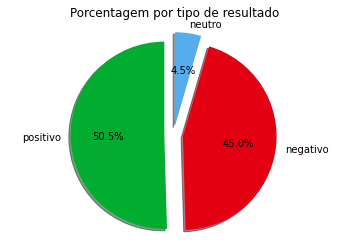

In [26]:
import matplotlib.pyplot as plt

labels = list(dfResultado['item'])
values = my_array

fig1, ax1 = plt.subplots()

c = ['#00AD2E','#E30013','#55ACEE'] # green, red, blue
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=c, explode = (0.1, 0.1, 0.1))

ax1.axis('equal')
ax1.set_title('Porcentagem por tipo de resultado')
plt.show()

## 2. Resultado por dia

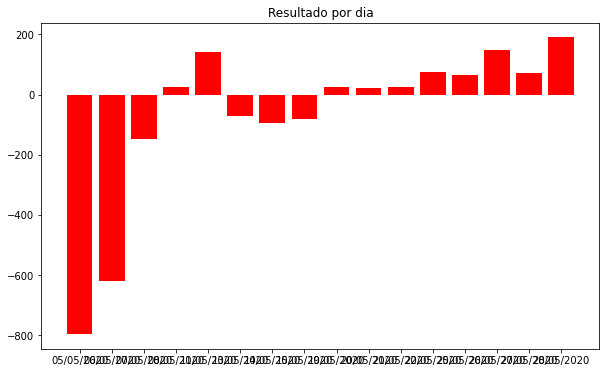

In [32]:
# Definindo variáveis
x = resumo.index
y = resumo.resultado
 
# Criando um gráfico
plt.figure(figsize=(10,6))
plt.bar(x, y, label = 'Barrar1', color = 'r')
plt.title("Resultado por dia")
 
plt.show()

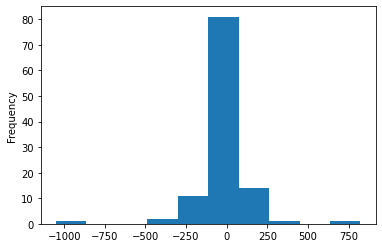

In [33]:
# histograma das inscrições pela pontuação do aluno
dados['Res. Tot. Líq.'].plot(kind='hist')

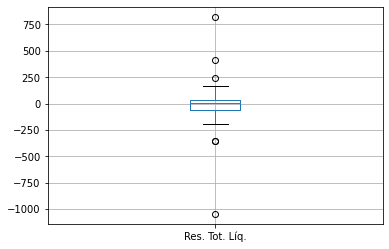

In [34]:
#plt.rc('figure', figsize = (14,6))
dados.boxplot(['Res. Tot. Líq.'])

In [0]:
#dados[dados['Res. Tot. Líq.'] > 0]

In [0]:
!pip install seaborn==0.9.0

In [35]:
import seaborn as sns
dados.columns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Index(['Papel', 'Abertura', 'Fechamento', 'Tempo', 'C/V', 'Prc Médio Cpa',
       'Prc Médio Vda', 'Result Total', 'Data', 'Res. Tot. Líq.',
       'Saldo Result.', 'resultado'],
      dtype='object')

In [0]:
#resultado_dia = sns.scatterplot(x='Res. Tot. Líq.', y='Data', data=dados)

## 3. Análise por dia



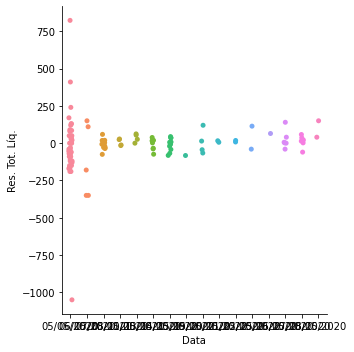

In [37]:
distribuicao_dia = sns.catplot(x='Data', y='Res. Tot. Líq.', data=dados)

In [0]:
# média dos resultados por dia
#dados.groupby(['Data']).mean()

In [0]:
# Frequência dos dias
#print('Frequência dos dias')
#dados['Data'].value_counts()

Distribuição dos gains obtidos


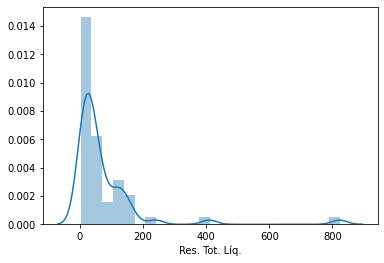

In [38]:
plotGain = dados.query("resultado == 'gain'")['Res. Tot. Líq.']
print("Distribuição dos gains obtidos")
plotGain = sns.distplot(plotGain)

Distribuição dos loss tomados


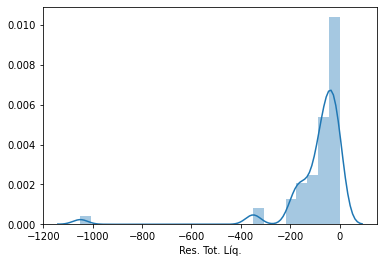

In [39]:
plotLoss = dados.query("resultado == 'loss'")['Res. Tot. Líq.']
print("Distribuição dos loss tomados")
plotLoss = sns.distplot(plotLoss)

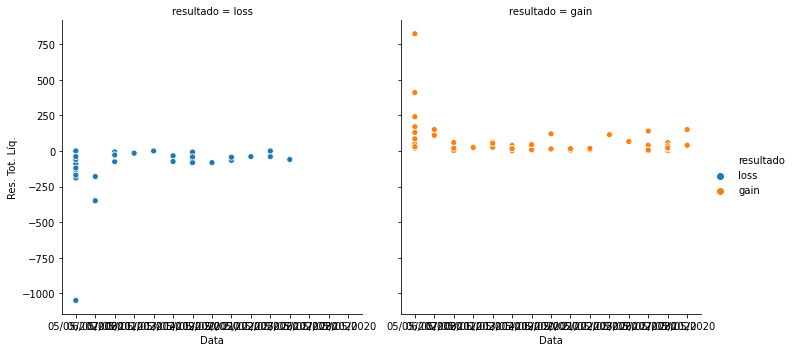

In [40]:
sns.relplot(x='Data', y='Res. Tot. Líq.', hue='resultado', col='resultado', data=dados)

In [0]:
# definição de valores para cálculo do ir
taxas_operacionais = 25
saldo_bruto = soma

saldo_liquido = saldo_bruto - taxas_operacionais
saldo_liquido = 0.2 * saldo_bruto

print('IR DEVIDO: ', saldo_liquido)